In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import mglearn
%matplotlib inline

### 2.3.3 선형 모델
+ 입력 특성에 대한 **선형 함수**를 만들어 예측

#### 회귀의 선형 모델

$$ \hat{Y} = w[0]x[0] + w[1]x[1] + ... + w[p]x[p] + b$$
+ w, b : 모델 파라미터
  + w : 가중치(계수)
  + b : 편향(절편)

w[0]: 0.393906  b: -0.031804


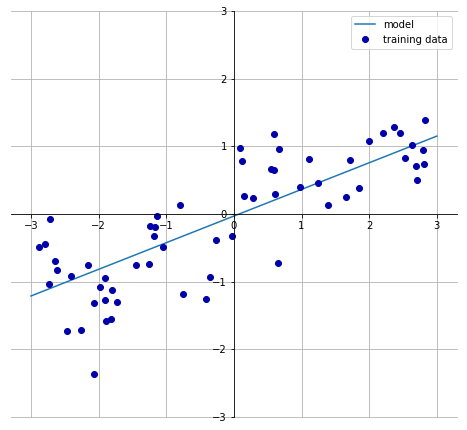

In [2]:
mglearn.plots.plot_linear_regression_wave()

#### 선형 회귀(최소 제곱법)
+ MSE를 최소화 하는 파라미터 w, b를 찾음

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [11]:
print('lr.coef_ : {}'.format(lr.coef_))
print('lr.intercept_ : {}'.format(lr.intercept_))

lr.coef_ : [ 0.39390555]
lr.intercept_ : -0.031804343026759746


+ $R^2$값

In [15]:
print('훈련 세트 점수 : {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 서트 점수 : {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 서트 점수 : 0.66


+ 보스턴 자료에서 LinearRegression

In [17]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [18]:
print('훈련 세트 점수 : {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 서트 점수 : {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 서트 점수 : 0.61


#### 릿지 회귀(L2규제)
+ $MSE + \alpha \Sigma_{j=1}^{m}w^{2}_j$ 를 최소화
  + w의 원소들을 0 에 가깝게 되길 원함
  + 패널티에 $\alpha$를 조절해서 훈련 세트의 성능 대비 모델을 얼마나 단순화 할지 지정(defult=1)

In [20]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print('훈련 세트 점수 : {:.2f}'.format(ridge.score(X_train, y_train)))
print('테스트 서트 점수 : {:.2f}'.format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.89
테스트 서트 점수 : 0.75


+ $\alpha = 10$ 

In [26]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('훈련 세트 점수 : {:.2f}'.format(ridge10.score(X_train, y_train)))
print('테스트 서트 점수 : {:.2f}'.format(ridge10.score(X_test, y_test)))

훈련 세트 점수 : 0.79
테스트 서트 점수 : 0.64


+ $\alpha = 0.1$ : LinearRegression으로 만든 모델과 비슷해진다.

In [27]:
ridge01 = Ridge(alpha=.1).fit(X_train, y_train)
print('훈련 세트 점수 : {:.2f}'.format(ridge01.score(X_train, y_train)))
print('테스트 서트 점수 : {:.2f}'.format(ridge01.score(X_test, y_test)))

훈련 세트 점수 : 0.93
테스트 서트 점수 : 0.77


+ 계수(w) 크기 비교

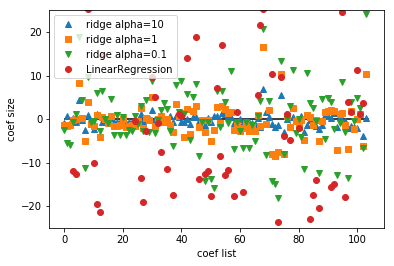

In [36]:
plt.plot(ridge10.coef_, '^', label='ridge alpha=10')
plt.plot(ridge.coef_, 's', label='ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('coef list')
plt.ylabel('coef size')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

+ 학습 곡선(learning curve)
  + 모든 데이터셋에 대해 릿지와 선형 회귀 모두 훈련 세트의 점수가 테스트 세트의 점수보다 높다
  + 릿지의 훈련 데이터 점수가 전체적으로 선형 회귀의 훈련 데이터 점수보다 낮다
  + 테스트 세트에서는 릿지의 점수가 높으며 선형 회귀의 경우 데이터 셋 크기가 400미만에서는 어떤 학습도 하지 못함

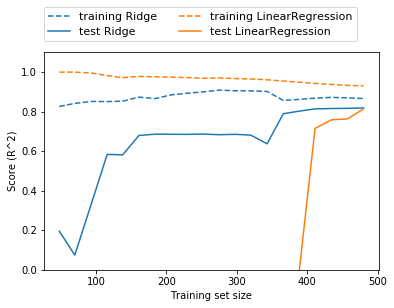

In [31]:
mglearn.plots.plot_ridge_n_samples()

#### f라쏘 회귀(L1규제)
+ $MSE + \alpha \Sigma_{j=1}^{m}|w_j|$ 를 최소화
  + w의 원소들을 0 에 가깝게 되길 원함
  + 패널티에 $\alpha$를 조절해서 훈련 세트의 성능 대비 모델을 얼마나 단순화 할지 지정(defult=1)
  + 릿지와 다른점은 L1규제로 어떤 계수는 정말 0 이됨
    + 모델에서 완전히 제외되는 특성이 생김

In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('훈련 세트 점수 : {:.2f}'.format(lasso.score(X_train, y_train)))
print('테스트 서트 점수 : {:.2f}'.format(lasso.score(X_test, y_test)))
print('사용한 특성 수 : {:}'.format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수 : 0.29
테스트 서트 점수 : 0.21
사용한 특성 수 : 4


In [34]:
# 'max_iter' 기본값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생한다.
# alpha=.01
lasso001 = Lasso(alpha=.01, max_iter=100000).fit(X_train, y_train)
print('훈련 세트 점수 : {:.2f}'.format(lasso001.score(X_train, y_train)))
print('테스트 서트 점수 : {:.2f}'.format(lasso001.score(X_test, y_test)))
print('사용한 특성 수 : {:}'.format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수 : 0.90
테스트 서트 점수 : 0.77
사용한 특성 수 : 33


In [35]:
# alpha=.0001
lasso0001 = Lasso(alpha=.0001, max_iter=100000).fit(X_train, y_train)
print('훈련 세트 점수 : {:.2f}'.format(lasso0001.score(X_train, y_train)))
print('테스트 서트 점수 : {:.2f}'.format(lasso0001.score(X_test, y_test)))
print('사용한 특성 수 : {:}'.format(np.sum(lasso0001.coef_ != 0)))

훈련 세트 점수 : 0.95
테스트 서트 점수 : 0.64
사용한 특성 수 : 94


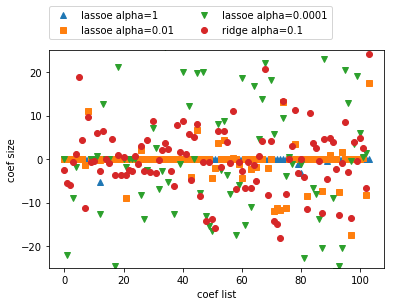

In [39]:
plt.plot(lasso.coef_, '^', label='lassoe alpha=1')
plt.plot(lasso001.coef_, 's', label='lassoe alpha=0.01')
plt.plot(lasso0001.coef_, 'v', label='lassoe alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='ridge alpha=0.1')
plt.xlabel('coef list')
plt.ylabel('coef size')
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))

+ 보통 릿지 회귀를 선호함(특성이 많고 그중 일부분만 중요하다면 Laddo가 더 좋은 선택일 수 있음)
+ Lasso와 Ridge의 페널티를 결함한 ElasticNet도 있음
$$ MSE + l_1 \times \Sigma_{j=1}^{m}|w_j| + \frac{1}{2}\times l_2 \times \Sigma_{j=1}^{m}w^{2}_j$$

#### 분류형 선형 모델

$$ w[0]x[0] + w[1]x[1] + ... + w[p]x[p] + b = \hat{Y} = \begin{cases}
1, & \mbox{if }\hat{Y} \ge 0 \\
-1, & \mbox{if }\hat{Y} < 0
\end{cases}$$ 

+ 선형 모델을 학습시키는 알고리즘
    + 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
    + 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지
    
    
+ 가장 널리 알려진 두 개의 선형 분류 알고리즘
  + 로지스틱 회귀(linear_model.LogisticRegression) 
    + loss function : cross-entropy
  + SVM(svm.LinearSVC)
    + loss function : squared hinge

+ forge 데이터셋을 이용하여 만든 LogisticRegression, LinearSVC 모델들의 결정 경계

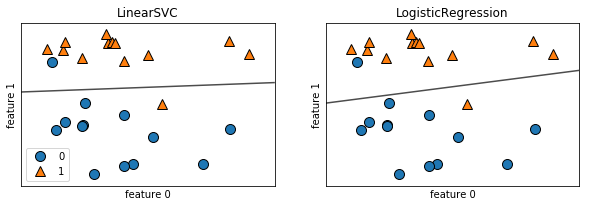

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend()

In [47]:
mglearn.plot_linear_svc_regularization()

TypeError: 'module' object is not callable